# Covid-19 Analysis India

As we all know, the Novel Coronavirus, SARS-CoV-2, has been the cause of a global pandemic, causing most of the world to shut down and adversely affecting the economies of various countries. India has been one such country where covid-19 cases have been spreading rapidly, with barely any signs of slowing down. 

This project attempts to find the trend in rise of covid-19 cases in different states of India using Regression Analysis. We will be analyzing India's covid-19 data and using various Machine Learning techniques, we will be training models to predict new data. 


## Dataset

[COVID-19 in India: Dataset on Novel Corona Virus Disease 2019 in India](https://www.kaggle.com/sudalairajkumar/covid19-in-india/activity)

Source: https://www.mohfw.gov.in/

The dataset we are using is a slightly modified version of the cited dataset. It contains the total number of positive, cured, death and active cases for each state from the genesis until 17-09-2020. It also contains the corresponding populations and population densities for each state. Moreover, it also contains the number of positive, cured and death cases registered on each particular day, in each state. 


## Libraries used

* sys: Used to manipulate the output to stdout
* os: Used to obtain pwd
* pandas 1.1.1: Used to read and handle the dataset
* datetime: Used to format dates
* numpy 1.19.1: Used to handle arrays 
* matplotlib 3.3.1: Used to visualize the data
* sklearn 0.23.2: Used to perform machine learning techniques on the data
 

In [2]:
import sys
import os
import pandas as pb
import datetime
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, RidgeCV, MultiTaskLassoCV, ElasticNetCV, MultiTaskElasticNetCV
from pandas.plotting import register_matplotlib_converters
dir_path = os.getcwd()
register_matplotlib_converters()
data = pb.read_csv("{}\\covid_india_data.csv".format(dir_path))
print(data.head(10))

   Sno      Date      Time         State/UnionTerritory  \
0  366  26/03/20   6:00 PM  Andaman and Nicobar Islands   
1  393  27/03/20  10:00 AM  Andaman and Nicobar Islands   
2  421  28/03/20   6:00 PM  Andaman and Nicobar Islands   
3  448  29/03/20   7:30 PM  Andaman and Nicobar Islands   
4  475  30/03/20   9:30 PM  Andaman and Nicobar Islands   
5  503  31/03/20   8:30 PM  Andaman and Nicobar Islands   
6  531  01/04/20   7:30 PM  Andaman and Nicobar Islands   
7  560  02/04/20   6:00 PM  Andaman and Nicobar Islands   
8  589  03/04/20   6:00 PM  Andaman and Nicobar Islands   
9  620  04/04/20   6:00 PM  Andaman and Nicobar Islands   

  ConfirmedIndianNational ConfirmedForeignNational  Cured  Deaths  Confirmed  \
0                       1                        0      0       0          1   
1                       1                        0      0       0          1   
2                       6                        0      0       0          6   
3                       -     

## Preprocessing

We first convert the DataFrame into a numpy array. We also format the dates in the DataFrame.

In [2]:
dat = data.to_numpy()
dat_ = dat
dates = []
for i in range(0,6286):
    dates.append(datetime.datetime.strptime(dat[i, 1], "%d/%m/%y"))
dates = matplotlib.dates.date2num(dates)

## Visualization

Here, we have visualized the rise in cases in two selected states which have similar populations, but with varying population densities, to highlight the effect population density has on rise in cases.

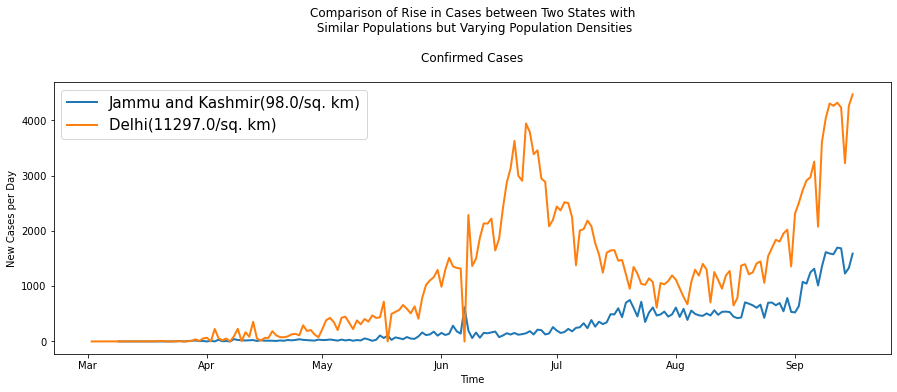

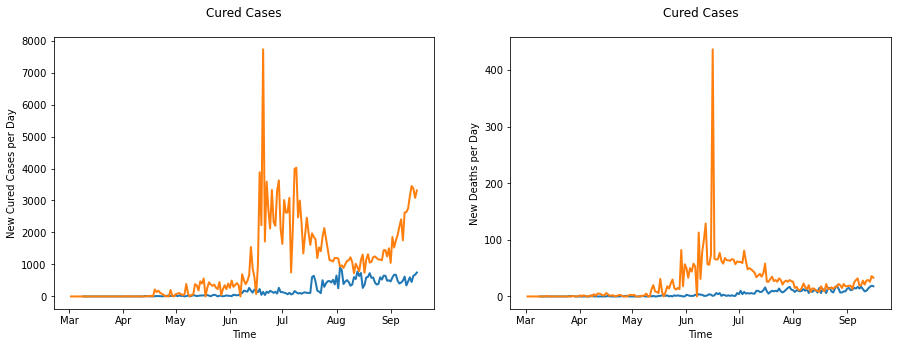

In [3]:
fig, ax = plt.subplots(figsize = (15,5))

ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b'))
ax.set_title('Comparison of Rise in Cases between Two States with\n Similar Populations but Varying Population Densities\n\nConfirmed Cases', pad=20)
ax.plot_date(dates[dat_[:,3] == 'Jammu and Kashmir'], dat_[dat_[:, 3] == 'Jammu and Kashmir'][:, 13], linestyle = 'solid', marker = 'None', linewidth = 2, label = "Jammu and Kashmir({}/sq. km)".format(dat_[dat_[:, 3] == 'Jammu and Kashmir'][0, 10]))
ax.plot_date(dates[dat_[:,3] == 'Delhi'], dat_[dat_[:, 3] == 'Delhi'][:, 13], linestyle = 'solid', marker = 'None', linewidth = 2, label = "Delhi({}/sq. km)".format(dat_[dat_[:, 3] == 'Delhi'][0, 10]))
ax.set(xlabel = "Time",ylabel = "New Cases per Day")
ax.legend(loc = "upper left", prop={'size': 15})


fig, ax = plt.subplots(figsize = (15,5), ncols = 2)

ax[0].xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b'))
ax[0].set_title('Cured Cases', pad=20)
ax[0].plot_date(dates[dat_[:,3] == 'Jammu and Kashmir'], dat_[dat_[:, 3] == 'Jammu and Kashmir'][:, 14], linestyle = 'solid', marker = 'None', linewidth = 2, label = "Jammu and Kashmir({}/sq. km)".format(dat_[dat_[:, 3] == 'Jammu and Kashmir'][0, 10]))
ax[0].plot_date(dates[dat_[:,3] == 'Delhi'], dat_[dat_[:, 3] == 'Delhi'][:, 14], linestyle = 'solid', marker = 'None', linewidth = 2, label = "Delhi({}/sq. km)".format(dat_[dat_[:, 3] == 'Delhi'][0, 10]))
ax[0].set(xlabel = "Time",ylabel = "New Cured Cases per Day")

ax[1].xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b'))
ax[1].set_title('Cured Cases', pad=20)
ax[1].plot_date(dates[dat_[:,3] == 'Jammu and Kashmir'], dat_[dat_[:, 3] == 'Jammu and Kashmir'][:, 15], linestyle = 'solid', marker = 'None', linewidth = 2, label = "Jammu and Kashmir({}/sq. km)".format(dat_[dat_[:, 3] == 'Jammu and Kashmir'][0, 10]))
ax[1].plot_date(dates[dat_[:,3] == 'Delhi'], dat_[dat_[:, 3] == 'Delhi'][:, 15], linestyle = 'solid', marker = 'None', linewidth = 2, label = "Delhi({}/sq. km)".format(dat_[dat_[:, 3] == 'Delhi'][0, 10]))
ax[1].set(xlabel = "Time",ylabel = "New Deaths per Day")

plt.show()

Next, we have visualized the rise in cases in two selected states which have similar population densities, but with varying populations, to highlight the effect population has on rise in cases. 

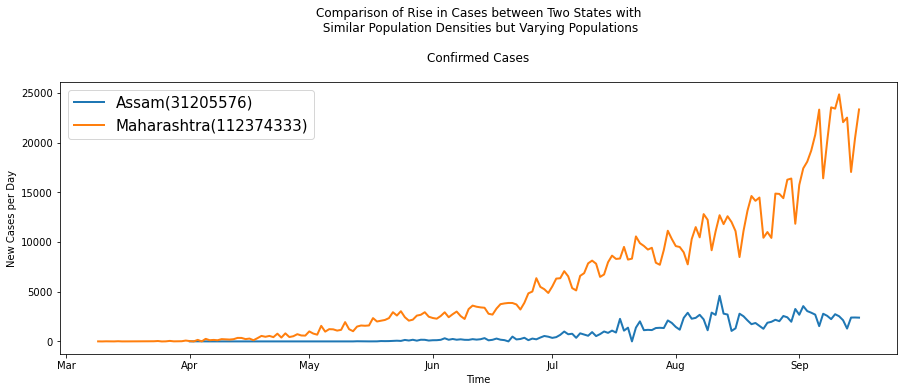

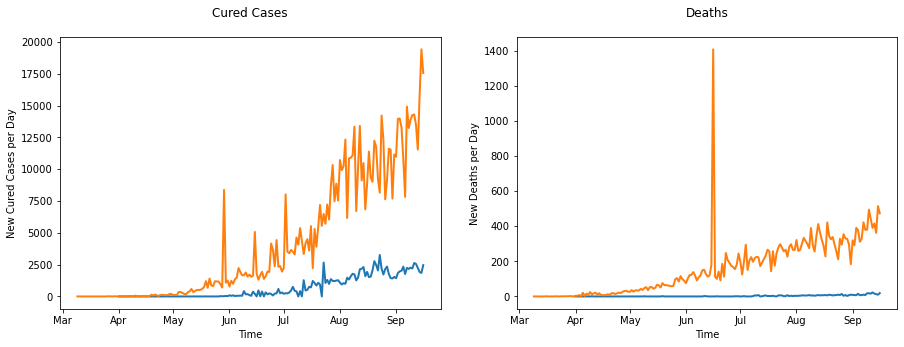

In [4]:
fig, ax = plt.subplots(figsize = (15,5))

ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b'))
ax.set_title('Comparison of Rise in Cases between Two States with\n Similar Population Densities but Varying Populations\n\nConfirmed Cases', pad=20)
ax.plot_date(dates[dat_[:,3] == 'Assam'], dat_[dat_[:, 3] == 'Assam'][:, 13], linestyle = 'solid', marker = 'None', linewidth = 2, label = "Assam({})".format(dat_[dat_[:, 3] == 'Assam'][0, 11]+dat_[dat_[:, 3] == 'Assam'][0, 12]))
ax.plot_date(dates[dat_[:,3] == 'Maharashtra'], dat_[dat_[:, 3] == 'Maharashtra'][:, 13], linestyle = 'solid', marker = 'None', linewidth = 2, label = "Maharashtra({})".format(dat_[dat_[:, 3] == 'Maharashtra'][0, 11]+dat_[dat_[:, 3] == 'Maharashtra'][0, 12]))
ax.set(xlabel = "Time",ylabel = "New Cases per Day")
ax.legend(loc = "upper left", prop={'size': 15})

fig, ax = plt.subplots(figsize = (15, 5), ncols = 2)

ax[0].xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b'))
ax[0].set_title('Cured Cases', pad=20)
ax[0].plot_date(dates[dat_[:,3] == 'Assam'], dat_[dat_[:, 3] == 'Assam'][:, 14], linestyle = 'solid', marker = 'None', linewidth = 2, label = "Assam({})".format(dat_[dat_[:, 3] == 'Assam'][0, 11]+dat_[dat_[:, 3] == 'Assam'][0, 12]))
ax[0].plot_date(dates[dat_[:,3] == 'Maharashtra'], dat_[dat_[:, 3] == 'Maharashtra'][:, 14], linestyle = 'solid', marker = 'None', linewidth = 2, label = "Maharashtra({})".format(dat_[dat_[:, 3] == 'Maharashtra'][0, 11]+dat_[dat_[:, 3] == 'Maharashtra'][0, 12]))
ax[0].set(xlabel = "Time",ylabel = "New Cured Cases per Day")

ax[1].xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b'))
ax[1].set_title('Deaths', pad=20)
ax[1].plot_date(dates[dat_[:,3] == 'Assam'], dat_[dat_[:, 3] == 'Assam'][:, 15], linestyle = 'solid', marker = 'None', linewidth = 2, label = "Assam({})".format(dat_[dat_[:, 3] == 'Assam'][0, 11]+dat_[dat_[:, 3] == 'Assam'][0, 12]))
ax[1].plot_date(dates[dat_[:,3] == 'Maharashtra'], dat_[dat_[:, 3] == 'Maharashtra'][:, 15], linestyle = 'solid', marker = 'None', linewidth = 2, label = "Maharashtra({})".format(dat_[dat_[:, 3] == 'Maharashtra'][0, 11]+dat_[dat_[:, 3] == 'Maharashtra'][0, 12]))
ax[1].set(xlabel = "Time",ylabel = "New Deaths per Day")
plt.show()

## Modelling 

We use different machine learning models to fit the data and determine which model fits the data best. We use the R^2 score as a single valued evaluation metric to compare the different models. 

### Features

We use the following features upto the fourth power, after normalization.

* Active cases
* Population Density
* Urban Population
* Rural Population

### Targets

We use the features to fit the following target variables - 

* New Confirmed Cases
* New Cured Cases
* New Death Cases

### Preprocessing 

We randomly split the dataset on an 80:20 ratio into the training and testing datasets and transform the four features into all the polynomial features upto the fourth degree.

### Models used 

* Linear Regression
* Ridge Regression(Linear Regression with L2 regularization)
* LASSO Regression(Linear Regression with L1 regularization)
* Elastic Net Regression(Linear Regression with both L1 and L2 regularization)

We randomly split the dataset, fit each model and score it against the testing dataset ten times and compare the average of these scores to determine which model fits the dataset best.





In [7]:
linearscores = []
ridgescores = []
lassoscores = []
elasticscores = []
alphaset = [3e-12, 1e-11, 3e-11, 1e-10, 3e-10, 1e-9, 3e-9, 1e-8, 3e-8]

for i in range(0,10):
    sys.stdout.write("\rIteration %i" % i)
    sys.stdout.flush()
    dat = np.random.permutation(dat_)
    X = PolynomialFeatures(4).fit_transform(dat[:, 9:13])
    Y = dat[:, 13:16]
    [X_train, X_test] = np.split(X, [5000])
    [Y_train, Y_test] = np.split(Y, [5000])
    linreg = LinearRegression(normalize = True).fit(X_train, Y_train)
    ridgereg = RidgeCV(alphas = alphaset, normalize = True).fit(X_train, Y_train)
    lassoreg = MultiTaskLassoCV(alphas = alphaset, cv = 5, tol = 0.05, normalize = True).fit(X_train, Y_train)
    elasticreg = MultiTaskElasticNetCV(l1_ratio = [.1, .5, .7, .9, .95, .99], alphas = alphaset, normalize = True, cv = 5, tol = 0.1).fit(X_train, Y_train)
    linearscores.append(linreg.score(X_test, Y_test))
    ridgescores.append(ridgereg.score(X_test, Y_test))
    lassoscores.append(lassoreg.score(X_test, Y_test))
    elasticscores.append(elasticreg.score(X_test, Y_test))
    
linearavgscore = np.mean(linearscores)
ridgeavgscore = np.mean(ridgescores)
lassoavgscore = np.mean(lassoscores)
elasticavgscore = np.mean(elasticscores)
print("\rLinear Regression Average Score = ", linearavgscore)
print("Ridge Regression Average Score = ", ridgeavgscore)
print("Lasso Regression Average Score = ", lassoavgscore)
print("Elastic Net Regression Average Score = ", elasticavgscore)

Linear Regression Average Score =  0.9263314123044992
Ridge Regression Average Score =  0.9262791310815406
Lasso Regression Average Score =  0.9027407279534938
Elastic Net Regression Average Score =  0.8946800831205781


As both Linear and Ridge Regressions have very similar scores, we iterate over them a hundred times to obtain a more generalized average.

In [8]:
for i in range(0, 100):
    sys.stdout.write("\rIteration %i" % i)
    sys.stdout.flush()
    dat = np.random.permutation(dat_)
    X = PolynomialFeatures(4).fit_transform(dat[:, 9:13])
    Y = dat[:, 13:16]
    [X_train, X_test] = np.split(X, [5000])
    [Y_train, Y_test] = np.split(Y, [5000])
    linreg = LinearRegression(normalize = True).fit(X_train, Y_train)
    ridgereg = RidgeCV(alphas = alphaset, normalize = True).fit(X_train, Y_train)
    linearscores.append(linreg.score(X_test, Y_test))
    ridgescores.append(ridgereg.score(X_test, Y_test))
print("\rLinear Regression Average Score = ", np.mean(linearscores))
print("Ridge Regression Average Score = ", np.mean(ridgescores))

Linear Regression Average Score =  0.9204787790515823
Ridge Regression Average Score =  0.922583587433146


Ridge Regression has a better score overall, so we use it to fit our data.

## Prediction

We use the data from 17-09-2020 which is seperately stored in another file.



In [9]:
predict_data = pb.read_csv("{}\\prediction_data.csv".format(di))
print(predict_data.head(5))

predict_data = predict_data.to_numpy()

    Sno      Date     Time         State/UnionTerritory  \
0  6352  17/09/20  8:00 AM  Andaman and Nicobar Islands   
1  6353  17/09/20  8:00 AM               Andhra Pradesh   
2  6354  17/09/20  8:00 AM            Arunachal Pradesh   
3  6355  17/09/20  8:00 AM                        Assam   
4  6356  17/09/20  8:00 AM                        Bihar   

  ConfirmedIndianNational ConfirmedForeignNational   Cured  Deaths  Confirmed  \
0                       -                        -    3345      52       3593   
1                       -                        -  497376    5105     592760   
2                       -                        -    4787      13       6692   
3                       -                        -  119367     511     148969   
4                       -                        -  148656     848     162463   

   Active  Population Density  Urban Population  Rural Population  
0     196                  46            143488            237093  
1   90279             

Firstly we use the selected model to fit the entire dataset.
We use this model to predict the cases for a selected state on 17-09-2020. Here, we have chosen Delhi. Consequently, we use the predicted data to determine the features of the next day. We repeat the process to predict the trend for 30 days. 


In [10]:
final_model = RidgeCV(alphas = alphaset, normalize = True).fit(X, Y)
dates_future = [datetime.datetime.strptime(predict_data[2, 1], "%d/%m/%y")]
dates_future = matplotlib.dates.date2num(dates_future)
latest_data = predict_data[predict_data[:, 3] == "Delhi"][:, 9:13]
predicted = np.array([[0,0,0]])
for i in range(0,30):
    latest_data[0][0] = latest_data[0][0] + predicted[-1, 0] - predicted[-1, 1] - predicted[-1, 2]
    X_for_prediction = PolynomialFeatures(4).fit_transform(latest_data)
    predicted = np.append(predicted, final_model.predict(X_for_prediction), axis = 0)
    dates_future = np.append(dates_future, dates_future[-1] + 1)

We visualize the predicted data along with the true data to gain insight about the trend that the curve is going to have for the next thirty days.

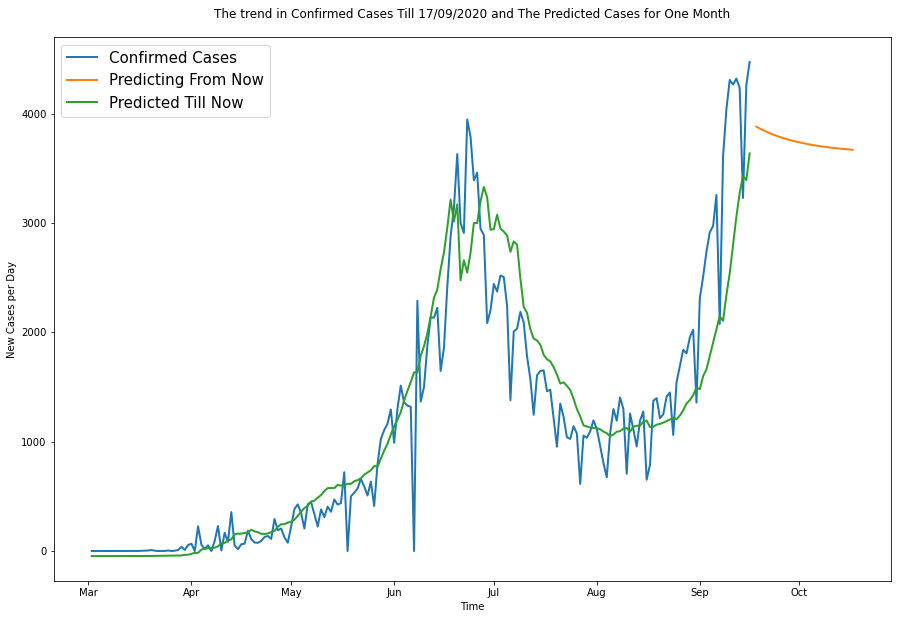

In [11]:
Y_ridge_predicted = ridgereg.predict(PolynomialFeatures(4).fit_transform(dat_[:, 9:13]))

fig, ax = plt.subplots(figsize = (15,10))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b'))
ax.set_title('The trend in Confirmed Cases Till 17/09/2020 and The Predicted Cases for One Month', pad=20)
plt.plot_date(dates[dat_[:,3] == 'Delhi'], dat_[dat_[:, 3] == 'Delhi'][:, 13], linestyle = 'solid', marker = 'None', linewidth = 2, label = "Confirmed Cases")
plt.plot_date(dates_future[1:31], predicted[1:, 0], linestyle = 'solid', marker = 'None', linewidth = 2, label = "Predicting From Now")
plt.plot_date(dates[dat_[:,3] == 'Delhi'], Y_ridge_predicted[dat_[:, 3] == 'Delhi'][:, 0], linestyle = 'solid', marker = 'None', linewidth = 2, label = "Predicted Till Now")
plt.xlabel("Time")
plt.ylabel("New Cases per Day")
plt.legend(loc = "upper left", prop={'size': 15})
plt.show()

## Conclusion 

We have found that for the next thirty days after 17-09-2020 there is actually a slight drop in the new cases. But, as with any other dataset which uses the most recent values for prediction (eg:weather prediction), the prediction becomes less reliable, the further into the future we try to predict. 

Please stay safe, stay home, wear masks, and maintain social distancing! 